In [104]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import os

In [105]:
EPOCH = 5
BATCHSIZE = 4
LR = 0.001
DOWNLOAD_DATA = True

In [106]:
transforms = Compose([
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [107]:
if os.path.exists('./data/cifar-10-batches-py'): DOWNLOAD_DATA = False

In [108]:
train_data = CIFAR10(
    root="./data",
    transform=transforms,
    download=DOWNLOAD_DATA,
    train=True,
    )

test_data = CIFAR10(
    root="./data",
    transform=transforms,
    download=DOWNLOAD_DATA,
    train=False
)

In [109]:
train_loader = DataLoader(
    train_data,
    batch_size=BATCHSIZE,
    shuffle=True,
)
test_loader = DataLoader(
    test_data,
    batch_size=BATCHSIZE,
    shuffle=True,
)
train_loader

torch.Size([4, 3, 32, 32]) torch.Size([4])


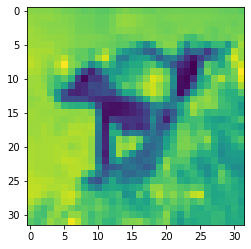

In [110]:
for x, y in test_loader:
    print(x.shape, y.shape)
    plt.imshow(x[0][0])
    break

In [111]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3,6,5), 
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(6,16,5), 
            nn.MaxPool2d(2),
        )
        self.deep_net = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.deep_net(x)
        return x

In [117]:
net = Net()
# net = models.resnet18(pretrained=True)


In [118]:
optim = torch.optim.Adam(net.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

In [119]:
def train(dataloader, model, loss_fn, optim):
    model.train()
    size = len(dataloader.dataset)
    for step, (x,y) in enumerate(dataloader):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        if step % 1000 == 0:
            loss, current = loss.item(), step * len(x)
            print(f'Loss {loss:7f} {current:>5d} / {size:>5d}')



In [120]:
def test(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f'Accuracy {(100*correct):>0.1f}% Average Loss {test_loss:>8f}\n')

In [121]:
for i in range(EPOCH):
    print(f'---{i + 1}---')
    train(train_loader, net, loss_fn, optim)
    test(test_loader, net, loss_fn)

---1---
Loss 2.283831     0 / 50000
Loss 1.823111  4000 / 50000
Loss 1.731058  8000 / 50000
Loss 1.679832 12000 / 50000
Loss 1.429509 16000 / 50000
Loss 0.994985 20000 / 50000
Loss 1.604383 24000 / 50000
Loss 1.307242 28000 / 50000
Loss 1.657388 32000 / 50000
Loss 1.043709 36000 / 50000
Loss 0.668164 40000 / 50000
Loss 1.478731 44000 / 50000
Loss 1.148186 48000 / 50000
Accuracy 54.1% Average Loss 1.292760

---2---
Loss 1.151972     0 / 50000
Loss 1.372321  4000 / 50000
Loss 1.667915  8000 / 50000
Loss 0.450480 12000 / 50000
Loss 0.681391 16000 / 50000
Loss 1.483456 20000 / 50000
Loss 1.957498 24000 / 50000
Loss 1.215411 28000 / 50000
Loss 2.394418 32000 / 50000
Loss 1.325554 36000 / 50000
Loss 2.426278 40000 / 50000
Loss 0.333637 44000 / 50000
Loss 1.634642 48000 / 50000
Accuracy 58.2% Average Loss 1.193043

---3---
Loss 1.480635     0 / 50000
Loss 1.051026  4000 / 50000
Loss 0.350538  8000 / 50000
Loss 0.801665 12000 / 50000
Loss 1.076990 16000 / 50000
Loss 0.773817 20000 / 50000
Loss

8 tensor(8)


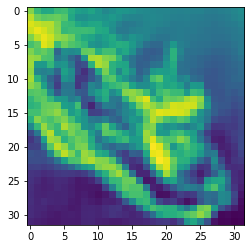

In [122]:
testx, testy = test_data[15][0], test_data[15][1]

np_testx = testx[0].numpy()
plt.imshow(np_testx)
test_pred_y = net(testx[None,...])
argmax_pred_y = torch.argmax(test_pred_y)
print(testy, argmax_pred_y)
